In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2024-05-01 20:18:16.587750: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 20:18:16.588018: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 20:18:16.589797: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 20:18:16.610165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 20:18:17.055918: W tensorflow/compiler/tf2tensorrt/utils/py_uti

## 1. DATA PREPROCESSING

In [4]:
dataset_30 = pd.read_csv("features_30_sec.csv")
class_counts_30 = dataset_30['label'].value_counts()
all_features_30 = dataset_30.columns[1:-1]
dataset_30 = dataset_30.dropna()

X_30 = dataset_30[all_features_30]
y_30 = dataset_30['label']
scaler = StandardScaler()
X_scaled_30 = scaler.fit_transform(X_30)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_scaled_30, y_30, test_size=0.2, random_state=42)


dataset_3 = pd.read_csv("features_3_sec.csv")
all_features_3 = dataset_3.columns[1:-1]
dataset_3 = dataset_3.dropna()

X_3 = dataset_3[all_features_3]
y_3 = dataset_3['label']
scaler = StandardScaler()
X_scaled_3 = scaler.fit_transform(X_3)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_scaled_3, y_3, test_size=0.2, random_state=42)

# RANDOM FOREST

In [5]:
rf_classifier_30 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_30.fit(X_train_30, y_train_30)

y_pred_30 = rf_classifier_30.predict(X_test_30)

print("30 second RF score:", accuracy_score(y_test_30, y_pred_30))
print("\n30 second Classification Report:\n", classification_report(y_test_30, y_pred_30))


rf_classifier_3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_3.fit(X_train_3, y_train_3)

y_pred_3 = rf_classifier_3.predict(X_test_3)

print("3 second RF score:", accuracy_score(y_test_3, y_pred_3))
print("\n3 secondClassification Report:\n", classification_report(y_test_3, y_pred_3))

30 second RF score: 0.755

30 second Classification Report:
               precision    recall  f1-score   support

       blues       0.63      0.85      0.72        20
   classical       1.00      1.00      1.00        13
     country       0.76      0.59      0.67        27
       disco       0.83      0.71      0.77        21
      hiphop       0.59      0.87      0.70        15
        jazz       0.95      0.91      0.93        22
       metal       0.86      0.96      0.91        25
         pop       0.75      0.69      0.72        13
      reggae       0.70      0.61      0.65        23
        rock       0.56      0.48      0.51        21

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.75       200

3 second RF score: 0.8828828828828829

3 secondClassification Report:
               precision    recall  f1-score   support

       blues       0.87      0.87      0.87       208


## CNN

In [13]:
label_encoder_30 = LabelEncoder()
y_train_encoded_30 = label_encoder_30.fit_transform(y_train_30)
y_test_encoded_30 = label_encoder_30.transform(y_test_30)

num_classes_30 = len(np.unique(y_train_encoded_30))
y_train_categorical_30 = tf.keras.utils.to_categorical(y_train_encoded_30, num_classes_30)
y_test_categorical_30 = tf.keras.utils.to_categorical(y_test_encoded_30, num_classes_30)

X_train_cnn_30 = X_train_30.reshape(X_train_30.shape[0], X_train_30.shape[1], 1)
X_test_cnn_30 = X_test_30.reshape(X_test_30.shape[0], X_test_30.shape[1], 1)

model_30 = Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_30.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes_30, activation='softmax')
])


optimizer_30 = keras.optimizers.Adam(learning_rate=0.0002)
optimizer_3 = keras.optimizers.Adam(learning_rate=0.0002)
model_30.compile(optimizer=optimizer_30, loss='categorical_crossentropy', metrics=['accuracy'])

history_30 = model_30.fit(X_train_cnn_30, y_train_categorical_30, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

y_pred_30 = model_30.predict(X_test_cnn_30)
y_pred_classes_30 = np.argmax(y_pred_30, axis=1)

print("30 second Test Accuracy:", accuracy_score(y_test_encoded_30, y_pred_classes_30))
print("\n30 second Classification Report:\n", classification_report(y_test_encoded_30, y_pred_classes_30))



label_encoder_3 = LabelEncoder()
y_train_encoded_3 = label_encoder_3.fit_transform(y_train_3)
y_test_encoded_3 = label_encoder_3.transform(y_test_3)

num_classes_3 = len(np.unique(y_train_encoded_3))
y_train_categorical_3 = tf.keras.utils.to_categorical(y_train_encoded_3, num_classes_3)
y_test_categorical_3 = tf.keras.utils.to_categorical(y_test_encoded_3, num_classes_3)

X_train_cnn_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[1], 1)
X_test_cnn_3 = X_test_3.reshape(X_test_3.shape[0], X_test_3.shape[1], 1)

model_3 = Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn_3.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes_3, activation='softmax')
])


# optimizer = keras.optimizers.Adam(learning_rate=0.0002)
model_3.compile(optimizer=optimizer_3, loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train_cnn_3, y_train_categorical_3, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

y_pred_3 = model_3.predict(X_test_cnn_3)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

print("3 second Test Accuracy:", accuracy_score(y_test_encoded_3, y_pred_classes_3))
print("\n3 second Classification Report:\n", classification_report(y_test_encoded_3, y_pred_classes_3))



/home/psy-ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30 second Test Accuracy: 0.7

30 second Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.87      1.00      0.93        13
           2       0.86      0.67      0.75        27
           3       0.45      0.43      0.44        21
           4       0.55      0.80      0.65        15
           5       0.90      0.82      0.86        22
           6       0.88      0.84      0.86        25
           7       0.62      0.77      0.69        13
           8       0.58      0.48      0.52        23
           9       0.57      0.57      0.57        21

    accuracy                           0.70       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.71      0.70      0.70       200



/home/psy-ubuntu/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
3 second Test Accuracy: 0.9024024024024024

3 second Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       208
           1       0.93      0.97      0.95       203
           2       0.78      0.87      0.82       186
           3       0.92      0.86      0.89       199
           4       0.96      0.90      0.93       218
           5       0.89      0.88      0.88       192
           6       0.95      0.97      0.96       204
           7       0.91      0.93      0.92       180
           8       0.92      0.88      0.90       211
           9       0.84      0.86      0.85       197

    accuracy                           0.90      1998
   macro avg       0.90      0.90      0.90      1998
weighted avg       0.90      0.90      0.90      1998



## K - Nearest Neighbour

In [11]:
knn_classifier_30 = KNeighborsClassifier(n_neighbors=27, p=2, metric='euclidean')
knn_classifier_30.fit(X_train_30, y_train_30)

y_pred_30 = knn_classifier_30.predict(X_test_30)

knn_score_30 = accuracy_score(y_test_30, y_pred_30)
print('30 second Accuracy:', knn_score_30)

print("\n30 second Classification Report:\n", classification_report(y_test_30, y_pred_30))


knn_classifier_3 = KNeighborsClassifier(n_neighbors=27, p=2, metric='euclidean')
knn_classifier_3.fit(X_train_3, y_train_3)

y_pred_3 = knn_classifier_3.predict(X_test_3)

knn_score_3 = accuracy_score(y_test_3, y_pred_3)
print('3 second Accuracy:', knn_score_3)

print("\n3 second Classification Report:\n", classification_report(y_test_3, y_pred_3))

30 second Accuracy: 0.575

30 second Classification Report:
               precision    recall  f1-score   support

       blues       0.53      0.40      0.46        20
   classical       0.80      0.92      0.86        13
     country       0.49      0.74      0.59        27
       disco       0.48      0.62      0.54        21
      hiphop       0.73      0.53      0.62        15
        jazz       0.92      0.55      0.69        22
       metal       0.77      0.80      0.78        25
         pop       0.48      0.77      0.59        13
      reggae       0.46      0.26      0.33        23
        rock       0.33      0.29      0.31        21

    accuracy                           0.57       200
   macro avg       0.60      0.59      0.58       200
weighted avg       0.59      0.57      0.57       200

3 second Accuracy: 0.7952952952952953

3 second Classification Report:
               precision    recall  f1-score   support

       blues       0.88      0.77      0.82       208

## Support Vector Machine

In [15]:
clf_30 = SVC(kernel='rbf', C=3.0, gamma='auto')
clf_30.fit(X_train_30, y_train_30)

y_pred_30 = clf_30.predict(X_test_30)

score_30 = clf_30.score(X_test_30, y_test_30)
print("Accuracy:", score_30)

print("\nClassification Report:\n", classification_report(y_test_30, y_pred_30))


clf_3 = SVC(kernel='rbf', C=3.0, gamma='auto')
clf_3.fit(X_train_3, y_train_3)

y_pred_3 = clf_3.predict(X_test_3)

score_3 = clf_3.score(X_test_3, y_test_3)
print("3 second Accuracy:", score_3)

print("\n3 second Classification Report:\n", classification_report(y_test_3, y_pred_3))


Accuracy: 0.745

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.86      0.92      0.89        13
           2       0.83      0.74      0.78        27
           3       0.68      0.71      0.70        21
           4       0.59      0.87      0.70        15
           5       0.90      0.86      0.88        22
           6       0.92      0.92      0.92        25
           7       0.62      0.62      0.62        13
           8       0.60      0.39      0.47        23
           9       0.59      0.62      0.60        21

    accuracy                           0.74       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

3 second Accuracy: 0.9109109109109109

3 second Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       208
           1       

## XG Boost

In [14]:
label_encoder_30 = LabelEncoder()
y_encoded_30 = label_encoder_30.fit_transform(y_30)

sc_X_30 = StandardScaler()
X_scaled_30 = sc_X_30.fit_transform(X_30)

X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_scaled_30, y_encoded_30, test_size=0.2, random_state=42)

clf_30 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded_30)))
clf_30.fit(X_train_30, y_train_30)

y_pred_30 = clf_30.predict(X_test_30)

score_30 = accuracy_score(y_test_30, y_pred_30)
print("30 second Accuracy:", score_30)

print("\n3 second Classification Report:\n", classification_report(y_test_30, y_pred_30))


label_encoder_3 = LabelEncoder()
y_encoded_3 = label_encoder_3.fit_transform(y_3)

sc_X_3 = StandardScaler()
X_scaled_3 = sc_X_3.fit_transform(X_3)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_scaled_3, y_encoded_3, test_size=0.2, random_state=42)

clf_3 = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_encoded_3)))
clf_3.fit(X_train_3, y_train_3)

y_pred_3 = clf_3.predict(X_test_3)

score_3 = accuracy_score(y_test_3, y_pred_3)
print("3 second Accuracy:", score_3)

print("\n3 second Classification Report:\n", classification_report(y_test_3, y_pred_3))

30 second Accuracy: 0.775

3 second Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        20
           1       1.00      1.00      1.00        13
           2       0.73      0.59      0.65        27
           3       0.73      0.76      0.74        21
           4       0.72      0.87      0.79        15
           5       1.00      0.91      0.95        22
           6       0.96      0.92      0.94        25
           7       0.71      0.77      0.74        13
           8       0.71      0.65      0.68        23
           9       0.61      0.52      0.56        21

    accuracy                           0.78       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.78      0.78      0.77       200

3 second Accuracy: 0.9109109109109109

3 second Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       208


## Results and Interpretation

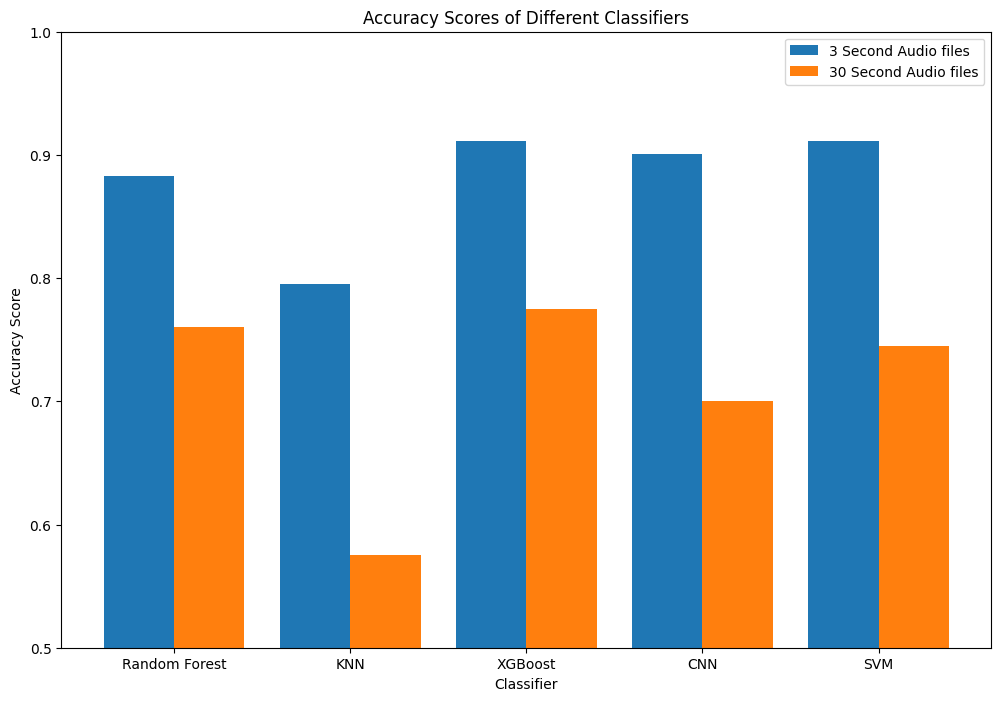

In [32]:
#Getting them plts
models = ['Random Forest', 'KNN', 'XGBoost', 'CNN', 'SVM']
accuracies_30 = [ 0.76, 0.575, 0.775, 0.7, 0.745]
accuracies_3 = [0.8828828828828829, 0.7952952952952953, 0.9109109109109109, 0.9004004004004004, 0.9109109109109109]

plt.figure(figsize=(12, 8))
X_axis = np.arange(len(models))
plt.bar(X_axis - 0.2, accuracies_3, 0.4, label = '3 Second Audio files')
plt.bar(X_axis + 0.2, accuracies_30, 0.4, label = '30 Second Audio files')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.xticks(X_axis, models)
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0.5, 1)  
plt.legend()
plt.show()